In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import healpy as hp
import numpy as np
from scipy import optimize
import pandas as pd

In [3]:
masks=['maskfullz','maskwo0_5','maskwo0_5noMod']
amp_deg,amp,dire_deg,dire_vec,dire_lonlat=[],[],[],[],[]
for n in masks:
    amp_deg.append(np.array(pd.read_csv('/home/ixaka/TFG/simul1/%s/amp_degi.dat'%n,header=None,sep=' ')))
    dire_deg.append(np.array(pd.read_csv('/home/ixaka/TFG/simul1/%s/dir_degi.dat'%n,header=None,sep=' ')))
    amp.append(np.array(pd.read_csv('/home/ixaka/TFG/simul1/%s/amp12.dat'%n,header=None,sep=' ')))
    dire_vec.append(np.array(pd.read_csv('/home/ixaka/TFG/simul1/%s/dir22.dat'%n,header=None,sep=' ')))
    dire_lonlat.append(np.array(pd.read_csv('/home/ixaka/TFG/simul1/%s/dir22_lonlat.dat'%n,header=None,sep=' ')))

In [4]:
beta=hp.ang2vec(264.021,48.253,lonlat=True) #direction of CMB dipole

In [5]:
l_deg,b_deg=[],[]
for i in dire_deg:
    lon,lat=hp.pix2ang(32,i,nest=True,lonlat=True)

In [6]:
ang_deg=[]
for i in dire_deg:
    ango=[]
    for d in i:
        cos=np.dot(beta,hp.pix2vec(64,d,nest=True))
        ango.append(np.arccos(cos))
    ang_deg.append(np.array(ango))

In [7]:
l,b=[],[]
for i in dire_lonlat:
    l.append(i.T[:][0])
    b.append(i.T[:][1])

In [8]:
ang=[]
for i in dire_vec:
    ango=[]
    for d in i:
        dnorm=d/np.linalg.norm(d)
        cos=np.dot(beta,dnorm)
        ango.append(np.arccos(cos))
    ang.append(np.array(ango))

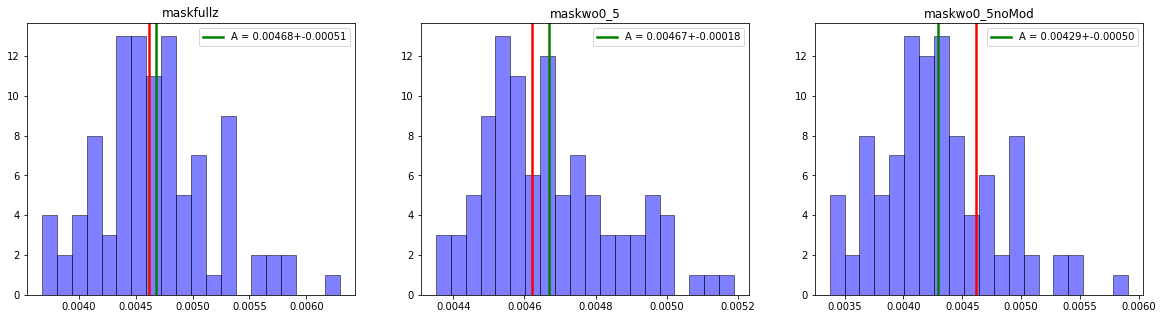

In [16]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
for i in range(len(amp)):
    a=amp[i]
    ax[i].set_title(masks[i])
    ax[i].hist(a,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
    ax[i].axvline(0.00462,c='r',lw=2.5)
    ax[i].axvline(np.mean(a),c='g',lw=2.5,label='A = %0.5f+-%0.5f'%(np.mean(a),np.std(a)))
    ax[i].legend()

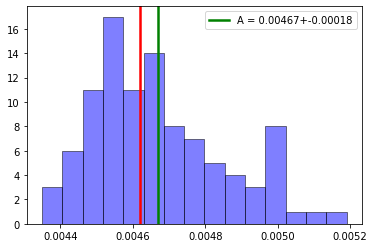

In [17]:
a=amp[1]
plt.hist(a,bins=15,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
plt.axvline(0.00462,c='r',lw=2.5)
plt.axvline(np.mean(a),c='g',lw=2.5,label='A = %0.5f+-%0.5f'%(np.mean(a),np.std(a)))
plt.legend()

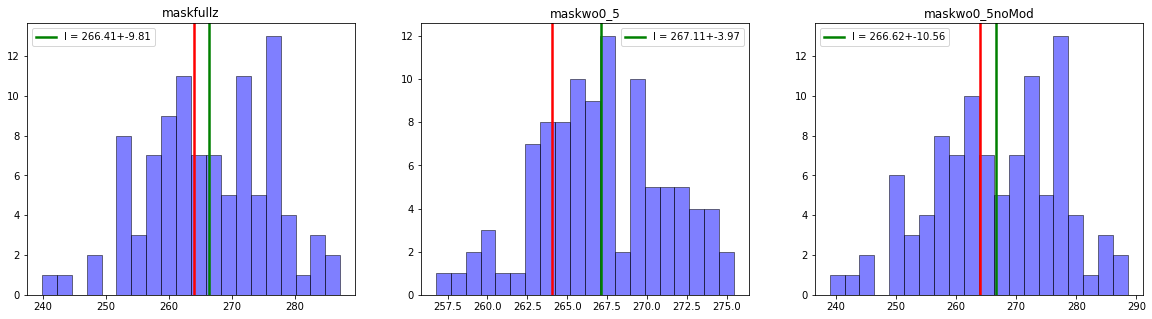

In [18]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
for i in range(len(amp)):
    li=l[i]
    ax[i].set_title(masks[i])
    ax[i].hist(li,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
    ax[i].axvline(264.021,c='r',lw=2.5)
    ax[i].axvline(np.mean(li),c='g',lw=2.5,label='l = %0.2f+-%0.2f'%(np.mean(li),np.std(li)))
    ax[i].legend()

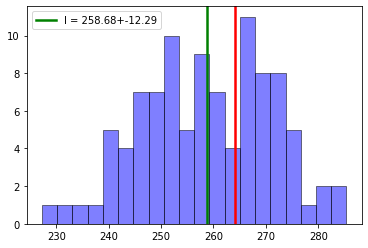

In [28]:
li=l[0]
plt.hist(li,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
plt.axvline(264.021,c='r',lw=2.5)
plt.axvline(np.mean(li),c='g',lw=2.5,label='l = %0.2f+-%0.2f'%(np.mean(li),np.std(li)))
plt.legend()

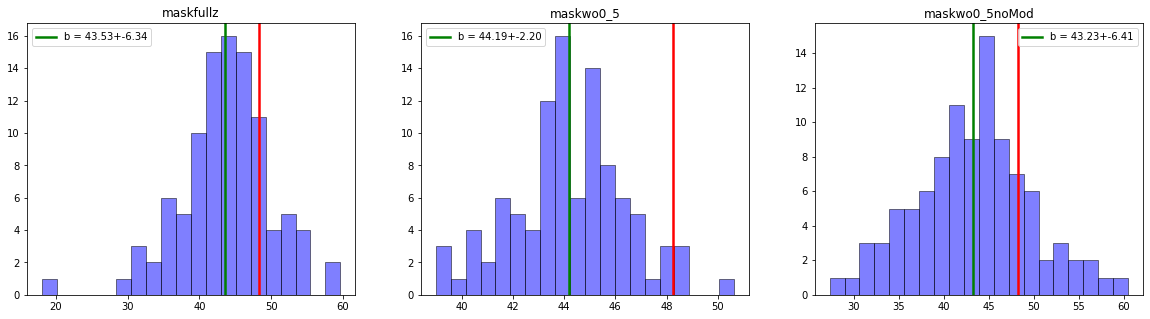

In [19]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
for i in range(len(amp)):
    bi=b[i]
    ax[i].set_title(masks[i])
    ax[i].hist(bi,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
    ax[i].axvline(48.253,c='r',lw=2.5)
    ax[i].axvline(np.mean(bi),c='g',lw=2.5,label='b = %0.2f+-%0.2f'%(np.mean(bi),np.std(bi)))
    ax[i].legend()

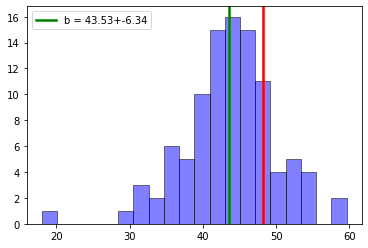

In [20]:
bi=b[0]
plt.hist(bi,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
plt.axvline(48.253,c='r',lw=2.5)
plt.axvline(np.mean(bi),c='g',lw=2.5,label='b = %0.2f+-%0.2f'%(np.mean(bi),np.std(bi)))
plt.legend()

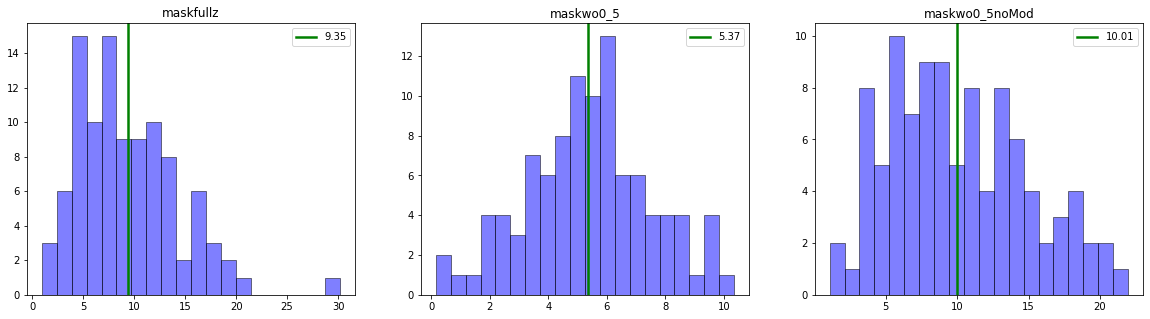

In [21]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
for i in range(len(amp)):
    angi=ang[i]*180/np.pi
    ax[i].set_title(masks[i])
    ax[i].hist(angi,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
    ax[i].axvline(np.mean(angi),c='g',lw=2.5,label=str(round(np.mean(angi),2)))
    ax[i].legend()

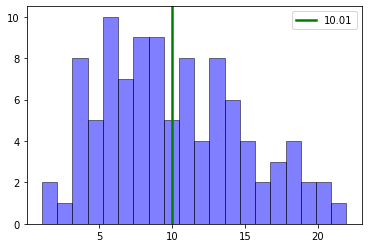

In [22]:
angi=ang[2]*180/np.pi
plt.hist(angi,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
plt.axvline(np.mean(angi),c='g',lw=2.5,label=str(round(np.mean(angi),2)))
plt.legend()

In [39]:
pm=u"\u00B1"
for i in amp:
    print(str(round(np.mean(i*1000),2))+pm+str(round(np.std(i*1000),2)))

4.68±0.51
4.67±0.18
4.29±0.5


In [40]:
for i in l:
    print(str(round(np.mean(i),2))+pm+str(round(np.std(i),2)))

266.41±9.81
267.11±3.97
266.62±10.56


In [41]:
for i in b:
    print(str(round(np.mean(i),2))+pm+str(round(np.std(i),2)))

43.53±6.34
44.19±2.2
43.23±6.41


In [37]:
for i in ang:
    print(str(round(np.mean(i*180/np.pi),2))+pm+str(round(np.sort(i)[68]*180/np.pi,2)))

9.35±11.54
5.37±6.21
10.01±12.72


[Text(0, 0, '150'),
 Text(0, 0, '120'),
 Text(0, 0, '90'),
 Text(0, 0, '60'),
 Text(0, 0, '30'),
 Text(0, 0, '0'),
 Text(0, 0, '330'),
 Text(0, 0, '300'),
 Text(0, 0, '270'),
 Text(0, 0, '240'),
 Text(0, 0, '210')]

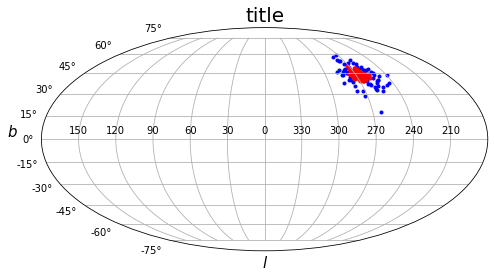

In [67]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111, projection="mollweide")
la,ba=[],[]
for i in range(3):
    la.append(np.deg2rad(360-l[i]))
    ba.append(np.deg2rad(b[i]))
ax.scatter(la[0],ba[0],c='b',marker='.')
ax.scatter(la[1],ba[1],c='r',marker='.')
ax.grid()
ax.set_xlabel(r"$l$",fontsize=15)
h=ax.set_ylabel(r'$b$',fontsize=15)
h.set_rotation(0)
ax.set_title('title',fontsize=20)
ax.set_xticklabels([150,120,90,60,30,0,330,300,270,240,210,180])

In [ ]:
fig, ax=plt.subplots(1,3,figsize=(20,5))
for i in range(len(amp)):
    angi=ang[i]*180/np.pi
    ax[i].set_title(masks[i])
    ax[i].hist(angi,bins=20,edgecolor='black',fc=(0,0,1,0.5),lw=0.5)
    ax[i].axvline(np.mean(angi),c='g',lw=2.5,label=str(round(np.mean(angi),2)))
    ax[i].legend()